# Домашнє завдання №11

# Частина №1. Рекурентна нейронна мережа RNN

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D      

### Встановлення гіперпараметрів:

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

### Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

### Передпроцесинг послідовних даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

### Побудова моделі

In [5]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


/Users/katerynaturuntseva/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Компіляція моделі

In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


### Навчання моделі

In [27]:
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - acc: 0.9567 - loss: 0.1229 - val_acc: 0.8637 - val_loss: 0.4359
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - acc: 0.9625 - loss: 0.1074 - val_acc: 0.8164 - val_loss: 0.4797
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - acc: 0.9677 - loss: 0.0920 - val_acc: 0.8509 - val_loss: 0.4963
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - acc: 0.9672 - loss: 0.0907 - val_acc: 0.8480 - val_loss: 0.4705
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - acc: 0.9759 - loss: 0.0707 - val_acc: 0.8264 - val_loss: 0.6227
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - acc: 0.9738 - loss: 0.0777 - val_acc: 0.8451 - val_loss: 0.5022
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - acc: 0.9848 - loss: 0.0475 - val_acc: 0.8564 - val_loss: 0.5146
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - acc: 0.9835 - loss: 0.0486 - val_acc: 0.8129 - val_loss: 0.6936
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - acc: 0.9

### Візуалізація результатів

In [28]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
    plt.title('Точність тренування і валідації')  
    plt.legend()  

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  
    plt.title('Втрати тренування і валідації')  
    plt.legend()  

    plt.show()  


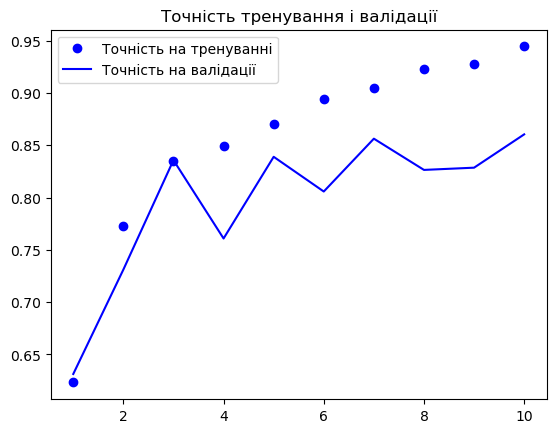

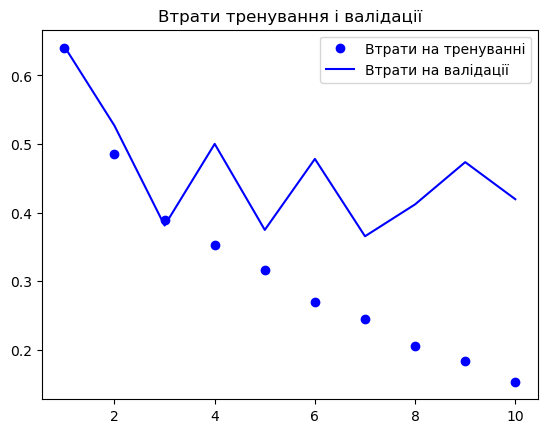

In [9]:
visualisation(history)

### Використання моделі

In [10]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))


In [11]:
prediction(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8552 - loss: 0.4304
Test Loss: 0.4291039705276489
Test Accuracy: 0.854960024356842


# Частина №2. Побудова моделі LSTM

In [12]:
from keras.layers import LSTM

In [13]:
model2 = Sequential()

model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [14]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - acc: 0.5313 - loss: 0.6919 - val_acc: 0.6543 - val_loss: 0.6656
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - acc: 0.6818 - loss: 0.6278 - val_acc: 0.7460 - val_loss: 0.5257
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - acc: 0.7688 - loss: 0.5047 - val_acc: 0.8075 - val_loss: 0.4284
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 301ms/step - acc: 0.8205 - loss: 0.4232 - val_acc: 0.8201 - val_loss: 0.4028
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - acc: 0.8351 - loss: 0.3983 - val_acc: 0.7973 - val_loss: 0.4360
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - acc: 0.8568 - loss: 0.3474 - val_acc: 0.8236 - val_loss: 0.3976
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - acc: 0.8668 - loss: 0.3262 - val_acc: 0.8453 - val_loss: 0.3643
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - acc: 0.8774 - loss: 0.3084 - val_acc: 0.8235 - val_loss: 0.3988
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/

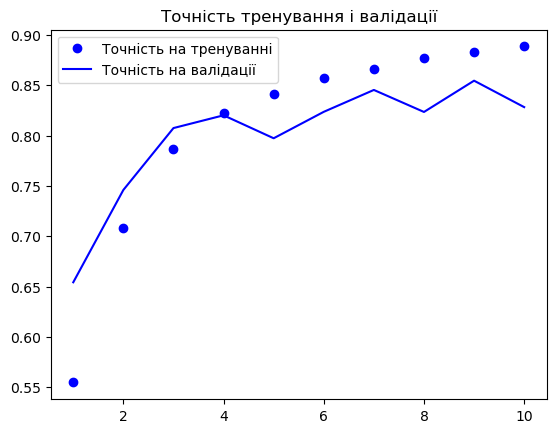

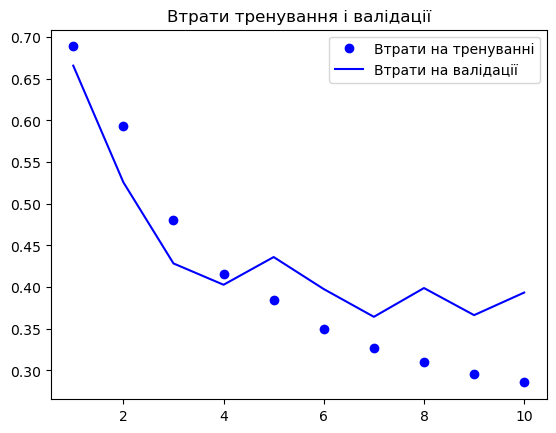

In [15]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

### Прогнозування з використанням навченої моделі

In [16]:
prediction(model2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.8249 - loss: 0.3924
Test Loss: 0.38518303632736206
Test Accuracy: 0.830560028553009


# Частина №3. Побудова моделі BRNN

In [17]:
from keras.layers import Bidirectional

In [18]:
model3 = Sequential()

model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [19]:
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 310ms/step - acc: 0.5128 - loss: 0.6927 - val_acc: 0.6115 - val_loss: 0.6854
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 26s 384ms/step - acc: 0.6491 - loss: 0.6469 - val_acc: 0.7821 - val_loss: 0.4906
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1008s 15s/step - acc: 0.7851 - loss: 0.4769 - val_acc: 0.7449 - val_loss: 0.5175
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2960s 44s/step - acc: 0.8310 - loss: 0.3968 - val_acc: 0.8287 - val_loss: 0.3939
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1023s 15s/step - acc: 0.8432 - loss: 0.3635 - val_acc: 0.8483 - val_loss: 0.3555
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 2290s 34s/step - acc: 0.8552 - loss: 0.3471 - val_acc: 0.8477 - val_loss: 0.3561
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 930s 14s/step - acc: 0.8678 - loss: 0.3242 - val_acc: 0.8553 - val_loss: 0.3431
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5751s 85s/step - acc: 0.8749 - loss: 0.3074 - val_acc: 0.8629 - val_loss: 0.3202
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1567s 23s/s

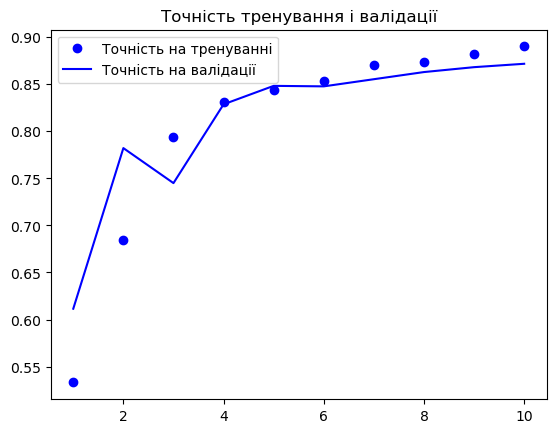

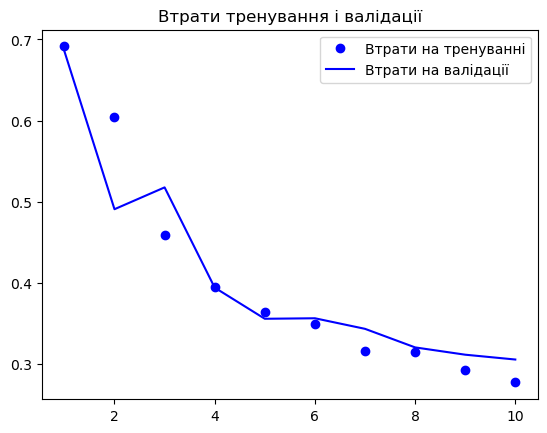

In [20]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

### Прогнозування з використанням навченої моделі

In [21]:
prediction(model3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 1894s 2s/step - acc: 0.8706 - loss: 0.3097
Test Loss: 0.3077847957611084
Test Accuracy: 0.8718000054359436


# Частина №4. Побудова моделі DRNN

In [22]:
model4 = Sequential()

model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))


### Компіляція і тренування моделі

In [23]:
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_3             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6396s 84s/step - acc: 0.5056 - loss: 0.6931 - val_acc: 0.5603 - val_loss: 0.6829
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3477s 51s/step - acc: 0.6447 - loss: 0.6350 - val_acc: 0.7748 - val_loss: 0.4836
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 9138s 134s/step - acc: 0.8008 - loss: 0.4518 - val_acc: 0.6695 - val_loss: 0.6665
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6541s 96s/step - acc: 0.8279 - loss: 0.4054 - val_acc: 0.7399 - val_loss: 0.5505
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4661s 57s/step - acc: 0.8386 - loss: 0.3810 - val_acc: 0.8513 - val_loss: 0.3514
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 62s 889ms/step - acc: 0.8794 - loss: 0.3089 - val_acc: 0.7780 - val_loss: 0.4965
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 67s 971ms/step - acc: 0.8825 - loss: 0.2944 - val_acc: 0.8669 - val_loss: 0.3491
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - acc: 0.8892 - loss: 0.2821 - val_acc: 0.8667 - val_loss: 0.3297
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step

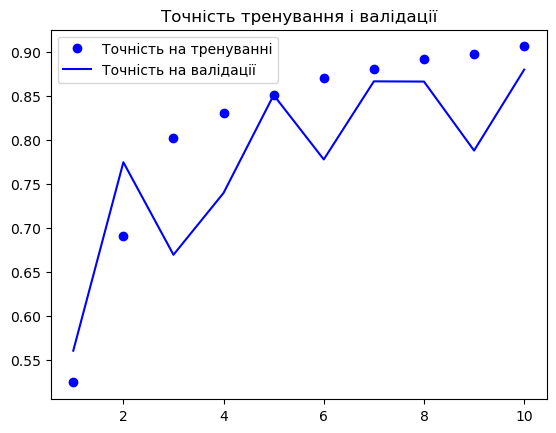

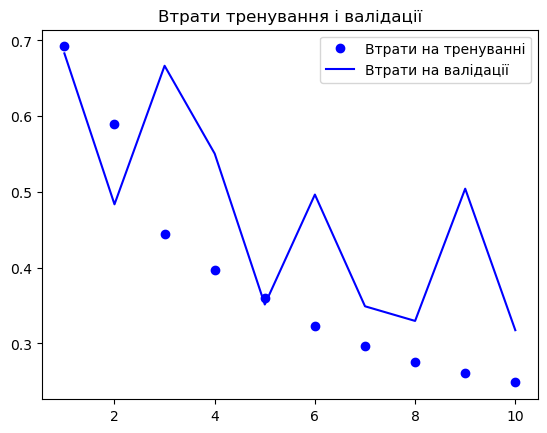

In [24]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

### Прогнозування з використанням навченої моделі

In [25]:
prediction(model4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - acc: 0.8726 - loss: 0.3268
Test Loss: 0.3217611312866211
Test Accuracy: 0.8754799962043762


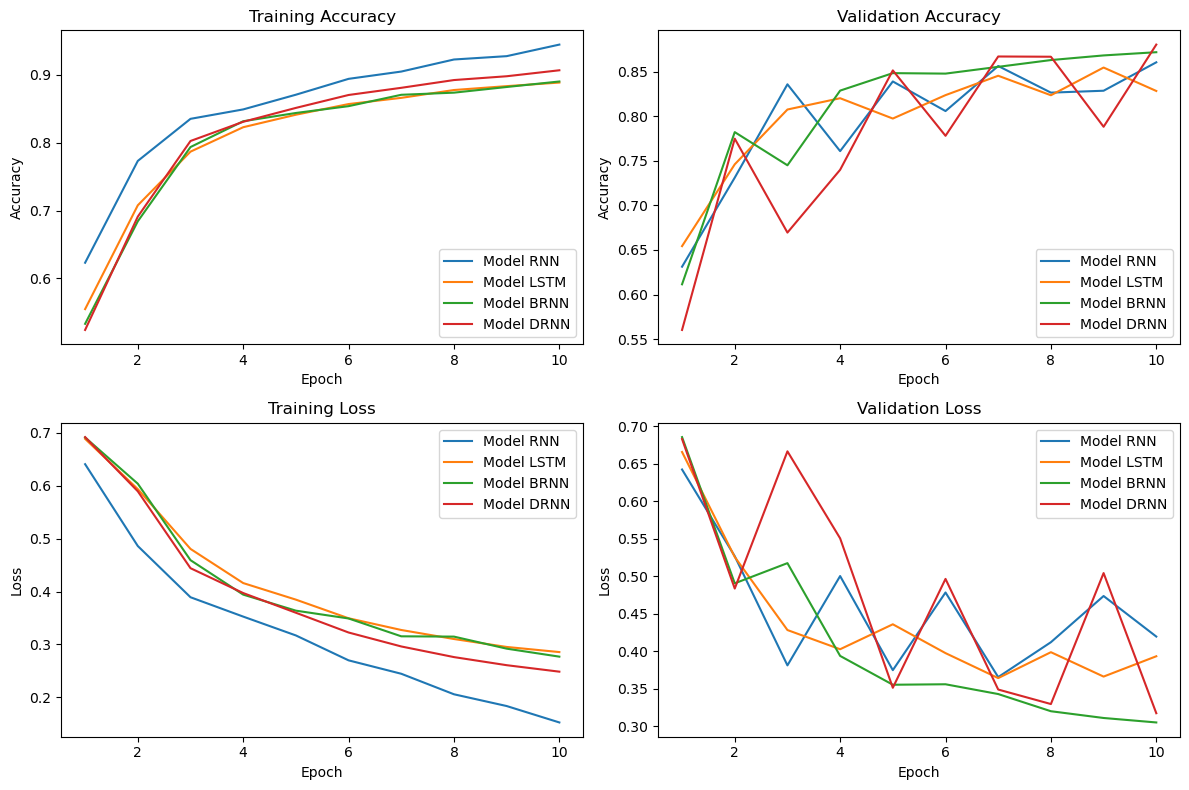

In [26]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Висновки:
Ми побудували 4 моделі, показники яких на тестових даних подані у таблиці:

| Модель | Точність |  Втрати  |
|--------|----------|----------|
|RNN     |  85.90%  |  42.63%  |
|LSTM    |  86.18%  |  34.43%  |
|BRNN    |  87.75%  |  33.07%  |
|DBRR    |  87.24%  |  32.64%  |
Кожна наступна модель на тестових даних показала кращу точність, окрім глибокої RNN. Треба зазначити, що кожна наступна модель тренувалася довше за попередні. Найдовше, відповідно, навчалася остання модель - DRNN, при цьому не давши покращення точності передбачення. Найстабільнішою на валідаційних даних виявилася модель LSTM. Для неї оптимальною була б кількість епох 9.
